Q2:
[[0.  1. ]
 [0.5 1. ]
 [1.  1. ]]
Q3:
[-21.         135.16666667]
Q4a:
[0. 0.]
[ 16.97649177 113.35002508]
[ -1.55289001 123.9968235 ]
[-11.04192959 129.44704645]
[-15.90087905 132.23788287]
[-18.38894852 133.66695616]
[-19.66298723 134.3987262 ]
[-20.31537039 134.77343573]
[-20.64942915 134.96530917]
[-20.82048699 135.06355972]
[-20.90807873 135.11386981]
[-20.95293087 135.13963156]
[-20.97589782 135.15282309]
[-20.98765826 135.15957794]
[-20.9936803  135.16303682]
[-20.99676394 135.16480797]
[-20.99834295 135.1657149 ]
[-20.99915149 135.16617931]
[-20.99956551 135.16641711]
[-20.99977752 135.16653888]
[-20.99988608 135.16660123]
[-20.99994166 135.16663316]
[-20.99997013 135.16664951]
[-20.9999847  135.16665788]
[-20.99999217 135.16666217]
[-20.99999599 135.16666436]
[-20.99999795 135.16666549]
[-20.99999895 135.16666606]
[-20.99999946 135.16666636]
[-20.99999972 135.16666651]
[-20.99999986 135.16666659]
[-20.99999993 135.16666663]
[-20.99999996 135.16666665]
[-20.99999998 135.166

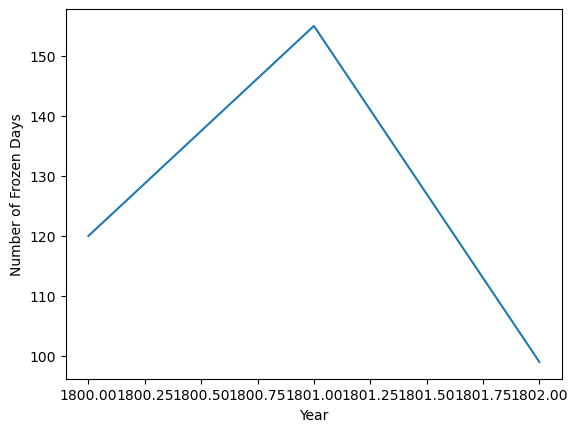

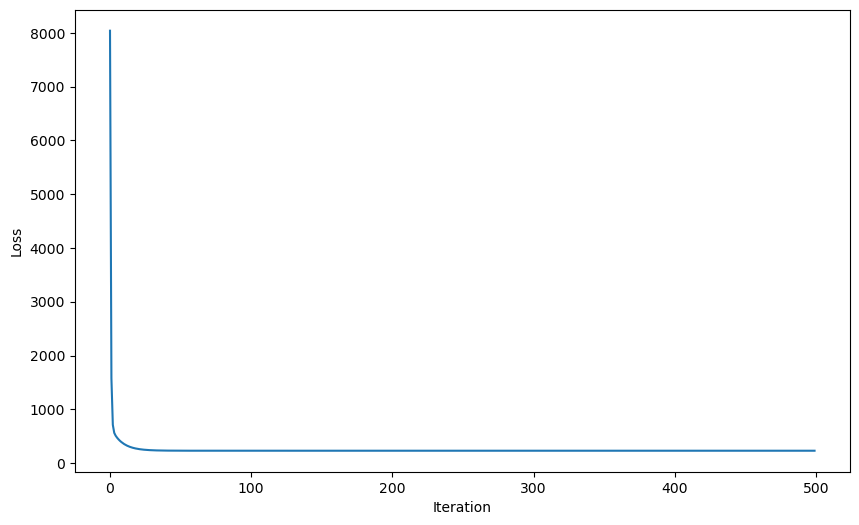

In [82]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filename = sys.argv[1]
learning_rate = float(sys.argv[2])
iterations = int(sys.argv[3])

# Question 1: Data Visualization
data = pd.read_csv(filename)
    
x = data.iloc[:, 0]
y = data.iloc[:, 1]
    
plt.xlabel('Year')
plt.ylabel('Number of Frozen Days')
plt.plot(x, y)
plt.savefig("data_plot.jpg")

# Question 2 Data Normalizaiton

# get years for normalization
x = data.iloc[:, 0].values

# min-max normalization
M = np.max(x)
m = np.min(x)
x_normalized = (x - m) / (M - m)

# take our normalized values, create an array of 1s, stack side by side
X_normalized = np.column_stack((x_normalized, np.ones_like(x_normalized)))

print("Q2:")
print(X_normalized)

# Question 3: Closed-Form Solution to Linear Regression

# frozen lake days
Y = data.iloc[:, 1].values

# X^T * X
X_transpose_timesX = np.dot(X_normalized.T, X_normalized)

# X^T * Y
X_transpose_timesY = np.dot(X_normalized.T, Y)

# Setup matrix for determinant calculation
a, b = X_transpose_timesX[0, 0], X_transpose_timesX[0, 1]
c, d = X_transpose_timesX[1, 0], X_transpose_timesX[1, 1]
det = a * d - b * c

X_transpose_timesX_inv = (1 / det) * np.array([[d, -b], [-c, a]])

# Now calculate the optimal weights and bias
weights_and_bias = np.dot(X_transpose_timesX_inv, X_transpose_timesY)

# Print the weights and bias
print("Q3:")
print(weights_and_bias)

# Question 4 Linear Regression with Gradient Descent

weights = np.zeros(2)
n = len(y)
losses = []

print("Q4a:")

for t in range(iterations):
    if t % 10 == 0:
        print(weights)

    y_pred = np.dot(X_normalized, weights)
    gradient = np.dot(X_normalized.T, (y_pred - y)) / n
    weights -= learning_rate * gradient

    loss = np.mean((y_pred - y) ** 2) / 2
    losses.append(loss)
    
print("Q4b:", learning_rate)
print("Q4c:", iterations)
print("Q4d: I started off with the default rates of a 0.1 learning rate and 100 iterations, but the graph wasn't seeing a sharp decline suggesting the model was converging too slowly. After trying a learning rate of 0.05 and 300 iterations I saw a better downward trend that flattened out towards the bottom looking towards the optimal solution")

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.savefig("loss_plot.jpg")

# Question 5: Model Prediction for 2023-24 (x = 2023)
x_test = 2023
w = weights_and_bias[0]  # Weight from closed-form solution
b = weights_and_bias[1]  # Bias from closed-form solution
x_test_normalized = (x_test - m) / (M - m)  # Normalize the test year
y_hat = w * x_test_normalized + b  # Predicted ice days for 2023-24


print(f"Q5: {y_hat}")

# Question 6a: Sign of weight w
if w > 0:
    sign_symbol = ">"
elif w < 0:
    sign_symbol = "<"
else:
    sign_symbol = "="
print(f"Q6a: {sign_symbol}")

# Question 6b: Interpretation of the sign of w
if w > 0:
    interpretation = "w > 0 means that the number of ice days is expected to increase as the years increase."
elif w < 0:
    interpretation = "w < 0 means that the number of ice days is expected to decrease as the years increase."
else:
    interpretation = "w = 0 means that the year doesn't have influence on the number of ice days."
print(f"Q6b: {interpretation}")

# Question 7a: Find the year x* where Lake Mendota will no longer freeze
x_star_normalized = -b / w
x_star = x_star_normalized * (M - m) + m  # Convert back to original scale

print(f"Q7a: {x_star}")

# Question 7b: Explanation of model limitations
limitations = "Looking at ice_data.csv, our predicted year where Lake Mendota will not freeze is the year 2463. While the recent years show a smaller amount of ice days, this prediction isn't realistic cause it assumes a constant rate of change. Additionally, external factors like climate change, which highly affects the ice production, is not taken into account for this model. So while x* isn't a bad idea, it's probably not realistic."
print(f"Q7b: {limitations}")
